# ISEL - CPS 
## Semestre 2021/22
# <br>
###  <center> 3º Trabalho Prático (Final) </center>
# </br>


Trabalho realizado por:
- António Ferreia, número <b> 47500 </b>
- Tomás Gomes, número <b> 48614 </b>




A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

O 3º trabalho foca o desenvolvimento dos blocos Modulação e desmodulação Digital e com estes é terminado o desenvolvimento de todo o sistema de transmissão digital.

Com o termino deste trabalho deve ser realizado um relatório integrador de todos os blocos.



Considere as funções criadas nos trabalhos anteriores.

Construa uma função que simule a modulação digital QPSK.
Esta função recebe como parâmetro de entrada um array de bits e retorna um array, simulando o sinal analógico modulado a transmitir. Dado que o sinal modulado é simulado, é necessário que a função ainda receba como parâmetros de entrada o número de pontos por cada símbolo ($P=8$), simulando a amostragem, e a energia média por bit ($E_b$). Admita que a frequência da portadora é tal que cada simbolo contém um período da portadora.


### Import's

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random
import PIL
from PIL import Image
import scipy as scp
from scipy import special

- QPSK usa quatro pontos no diagrama de constelação, equidistantes em torno de um círculo. Com quatro fases, QPSK pode codificar dois bits por símbolo
![fig_trab](const_qpsk.png)

In [2]:
simbolos = {"[0 0]": np.pi/4,     #  45º
            "[0 1]": (3*np.pi)/4, # 135º
            "[1 1]": (5*np.pi)/4, # 225º
            "[1 0]": (7*np.pi)/4} # 315º

In [3]:
def mod_QPSK(bits,Eb=2,P=8):
    amplitude = np.sqrt((2/P)*Eb)
    t = np.arange(P)
    aux = len(bits) % 2
    nZeros = 2-aux if aux != 0 else 0
    flag = nZeros   
    arr_bits = np.append(bits,np.zeros(nZeros),0)
    arr_bits = np.array([int(arr_bits[i]) for i in range(len(arr_bits))])
    nLines = int(len(arr_bits)/2)
    arr_binary = np.reshape(arr_bits, (nLines,2))
    i = 0
    signal = np.zeros(len(arr_binary)*P)
    for s in arr_binary:
        modulacao = amplitude*np.cos(2 * np.pi/P * t + simbolos[str(s)])
        signal[i*P:(i+1)*P] = modulacao
        i += 1   
    return signal, flag

[1 1 0 0 0 1 1 0]


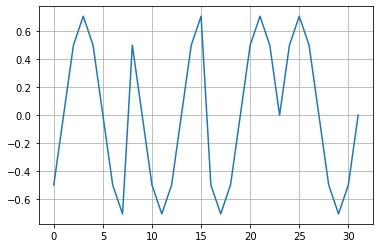

In [4]:
#m = np.random.choice([0,1], size=(150,),p=[1./2,1./2])
m = np.array([1,1,0,0,0,1,1,0])
print(m)
qpsk = mod_QPSK(m)
plt.plot(qpsk[0])
plt.grid()

MODULAÇÂO:
[-5.00000000e-01 -1.29893408e-16  5.00000000e-01  7.07106781e-01
  5.00000000e-01  2.16489014e-16 -5.00000000e-01 -7.07106781e-01
  5.00000000e-01  4.32978028e-17 -5.00000000e-01 -7.07106781e-01
 -5.00000000e-01 -1.29893408e-16  5.00000000e-01  7.07106781e-01
 -5.00000000e-01 -7.07106781e-01 -5.00000000e-01 -1.29893408e-16
  5.00000000e-01  7.07106781e-01  5.00000000e-01  2.16489014e-16
  5.00000000e-01  7.07106781e-01  5.00000000e-01  2.16489014e-16
 -5.00000000e-01 -7.07106781e-01 -5.00000000e-01 -3.03084620e-16]

RUIDO: 
[-0.33546117 -0.36492836  0.03639825 -0.01023308 -0.20871208 -0.42529187
 -0.01038814  0.8354869   0.78929775 -0.47854828  0.2119216   0.00331649
  0.64143246  0.26525778 -0.18042805 -0.13491263  0.28450962 -0.10721752
 -0.81311602  0.5051327   0.23226458 -0.17336608 -0.376372   -0.40195828
 -0.14380532  0.28964685  0.5291057   0.46294154  0.76617055 -0.12156772
  0.28593448 -0.23860224]

CANAL: 
[-0.83546117 -0.36492836  0.53639825  0.6968737   0.2912879

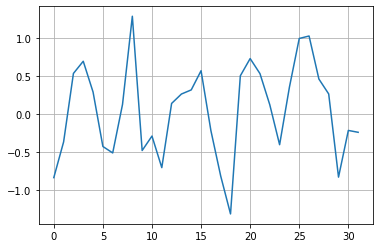

In [5]:
print('MODULAÇÂO:')
print(qpsk[0])
print()
noise = np.random.normal(0, 0.5, len(qpsk[0]))
print('RUIDO: ')
print(noise)
print()
channel =  noise + qpsk[0]
print('CANAL: ')
print(channel)
plt.plot(channel)
plt.grid()

Construa uma função que simule, no receptor, um filtro adaptado (desmodulação).
Este deve receber um array com o sinal QPSK com ruído e deve retornar um array com a sequência binária correspondente.


- Estrutura do receptor para QPSK. Os filtros correspondentes podem ser substituídos por correlacionadores. Cada dispositivo de detecção usa um valor limite de referência para determinar se um 1 ou 0 é detectado.

In [6]:
def desmodulation(mensagem,flag,P=8):
    t = np.arange(P)
    c1 = np.cos( 2*np.pi/P * np.arange(0,P)) 
    c1 = c1/np.sqrt(np.sum(c1**2))
    c2 = np.sin( 2*np.pi/P * np.arange(0,P)) 
    c2 = c2/np.sqrt(np.sum(c2**2))
    conjunto = 0
    sinal = np.array([])
    for i in range(0,int(len(mensagem)/P)): 
        produtoInterno1 = np.sum(mensagem[i*P : (i+1)*P]*c1) #x1
        produtoInterno2 = np.sum(mensagem[i*P : (i+1)*P]*c2) #x2
        
        if(produtoInterno1  < 0  and produtoInterno2 > 0):
            conjunto = [1,1]
        elif(produtoInterno1 > 0 and produtoInterno2 > 0):
            conjunto = [1,0]
        elif(produtoInterno1 > 0 and produtoInterno2 < 0):
            conjunto = [0,0]
        elif(produtoInterno1 < 0 and produtoInterno2 < 0):
            conjunto = [0,1]
        
        sinal = np.hstack([sinal,conjunto]) 
        
    sinal = sinal[0:len(sinal)-flag]
    return sinal

In [7]:
print("Mensagem original    -> " + str(m))
des = desmodulation(channel,qpsk[1])
des = np.array([int(des[i]) for i in range(len(des))])
print("Mensagem desmodulada -> " + str(des))
if(np.array_equal(des,m)):
    print("São iguais")
else:
    print("Não são iguais")

Mensagem original    -> [1 1 0 0 0 1 1 0]
Mensagem desmodulada -> [1 1 0 0 0 1 1 0]
São iguais


Construa uma função que simule um canal AWGN.
Esta função recebe o sinal modulado, adiciona ruído (com uma determinada potência $\sigma_n$)
e devolve o sinal com ruído num array.
A função deve ter como parâmetro de entrada a potência do ruído a adicionar

In [8]:
def AWGN(sinal_in, pot_noise):
    return sinal_in + np.sqrt(pot_noise) * np.random.normal( len(sinal_in))

Construa uma função que calcule o BER teórico para a modulação implementada.

\begin{align}
    \frac{1}{2} erfc \sqrt{\frac{E_b}{N_0}}
\end{align}

In [9]:
def BER_teorico(Eb, pot_noise):
    N0 = 2*(pot_noise)
    BER_t = (1/2)*scp.special.erfc(Eb/N0)
    return BER_t

##### Avalie todo o sistema de emissão e receção.
Para isso deve medir experimentalmente e comparar, sempre que possível, com os valores teóricos, os seguintes índices:

- A SNR no canal e SNR na recepção;
- BER antes e depois da correcção de erros;
- Apresente a constelação antes e depois do sinal passar pelo canal.

Para o efeito deve atribuir diferentes valores aos parâmetros do sistema e avalia-lo com e sem o modulo de correcção de erros.

Use a imagem fornecida anteriormente para experimentar o sistema com todos os blocos desenvolvidos


In [10]:
def Quantific(R,Vmax,Qtype):
    L = 2.**R 
    delta = (2.*Vmax)/L
    delta_2 = delta/2
    v_max_posi = (L-1)*delta_2
    
    Vq = np.arange(-v_max_posi, v_max_posi+delta, delta)
    Iq = np.arange(-Vmax, Vmax+delta, delta)

    if(Qtype == 'midtread'): # midtread
        Iq[1:-1] = Iq[1:-1]+delta_2
        Vq = Vq + delta_2

    return Vq, Iq

In [11]:
def Quantificador(Rx, Vq, Iq):
    iq = np.digitize(Rx,Iq)
    iq = np.array([len(Vq)-1 if Rx >= len(Vq) else Rx for Rx in iq])
    xq = Vq[iq-1]   
    return xq,iq

In [12]:
def Measure_SNRp(signal, signalQ):
    error = signal - signalQ
    SNRp = 10 * np.log10(sum(signal**2) / sum(error**2))
    return SNRp

In [13]:
def Measure_SNRt(signal, VqMax, R):
    P = sum(signal**2.)/len(signal) 
    SNRt = 6.02 * R + 10 * (np.log10((3 * P) / (VqMax)))
    return SNRt

In [14]:
def Codific(arr_signal_quantized,R):
    L = 2**R
    arr_signal_quantized = [int(i) for i in arr_signal_quantized]
    arr_binary = np.array([np.binary_repr(min(max(y,0),L-1), width=R) for y in arr_signal_quantized]).flatten()
    arr_binary = (''.join(arr_binary))
    arr_binary = [int(i) for i in arr_binary]
    return arr_binary

In [15]:
def Descodific(arr_binary,R):
    arr_signal = [int("".join(str(i) for i in arr_binary[x:x+R]),2) for x in np.arange(0,len(arr_binary),R)]
    return arr_signal

In [16]:
G = np.array([[1,0,0,0,1,1,0,1],
              [0,1,0,0,1,0,1,1],
              [0,0,1,0,0,1,1,1],
              [0,0,0,1,1,1,1,0]])

def Hamming_8_4(arr_bits):
    aux = len(arr_bits) % 4
    nZeros = 4-aux if aux != 0 else 0
    arr_bits = np.append(arr_bits,np.zeros(nZeros),0)
    nLines = int(len(arr_bits)/4)
    arr_binary = np.reshape(arr_bits, (nLines,4))
    arr_binary = np.array([np.dot(arr_binary[i],G)%2 for i in range(nLines)])
    return np.array(arr_binary).flatten()

In [17]:
Ht = G.transpose()

def detetor(arr_binary):
    step = int(len(arr_binary)/8)
    #Deteta
    new_arr   = np.reshape(arr_binary,(step,8))
    sindromes = np.array([np.dot(new_arr[i],Ht) for i in range(step)])
    sindromes = sindromes%2    
    #corrige
    if(len(arr_binary)  == 8):
        new_arr = arr_binary[0:4]
        aux_arr = np.logical_xor(new_arr,sindromes)
        aux_arr = aux_arr.flatten().astype(int)
    else:
        arr_bits = np.reshape(arr_binary,(step,8))
        arr_bits = arr_bits[:,0:4]
        aux_arr  = np.array([np.logical_xor(arr_bits[i], sindromes[i]) for i in range(step)])
        aux_arr  = aux_arr.flatten().astype(int)
    
    return aux_arr

In [18]:
def BER_pratico(arr_bin_tx, arr_bin_rx):
    nErros = len(arr_bin_tx) - np.count_nonzero( arr_bin_tx == arr_bin_rx  )
    BER_pratico = nErros/len(arr_bin_tx)       
    return BER_pratico

![fig_trab](esquemaCPS.png)

- ###### Sampling

In [42]:
im  = Image.open("lena_gray.bmp")
img = np.asarray(im)

- ###### Quantification

In [43]:
Vq, Iq = Quantific(8,245,'midtread')
x0     = [Quantificador(row,Vq,Iq)[0] for row in img]
SNRT   = Measure_SNRt(img.flatten(), 255, 4)
print('SNR Teórico')
print(SNRT)

SNR Teórico
47.26770647743086


 - ###### Encoding

In [44]:
cod = [Codific(_x0,8) for _x0 in x0]

- ##### Controlo de Erros

In [45]:
hamming = [Hamming_8_4(_cod) for _cod in cod]

- ###### QPSK Modulation 

In [46]:
QPSK      = [mod_QPSK(_hamming) for _hamming in hamming]
BERt      = BER_teorico(8,1)
SNRCanalP = Measure_SNRp(img.flatten(),np.array(x0).flatten())
print('SNR Canal Prático')
print(SNRCanalP)

SNR Canal Prático
25.35234898510979


- ###### AWGN Channel

In [53]:
QPSKAWGN = [[AWGN(_QPSK[0],0.02) + np.random.normal(0, 0.5,len(_QPSK[0])), _QPSK[1]] for _QPSK in QPSK]
#QPSKAWGN = [[AWGN(_QPSK[0],0.02) , _QPSK[1]] for _QPSK in QPSK]

- ###### Demodulation

In [54]:
demod     = [desmodulation(msg[0], msg[1]) for msg in QPSK]
demodAWGN = [desmodulation(msg[0],msg[1]) for msg in QPSKAWGN]
BERp0     = BER_pratico(np.array(demod).flatten(),np.array(hamming).flatten())
print(BERp0)

0.0


- ###### Error correction

In [55]:
detect     = [detetor(_demod) for _demod in demod]
detectAWGN = [detetor(_demod) for _demod in demodAWGN]
BERp1      = BER_pratico(np.array(detect).flatten(),np.array(cod).flatten())
print(BERp1)

0.0


- ###### Decoding

In [56]:
descodificacao     = [Descodific(_detect, 8) for _detect in detect]
descodificacaoAWGN = [Descodific(_detect, 8) for _detect in detectAWGN]
SNRRecetorP        = Measure_SNRp(img.flatten(),np.array(descodificacao).flatten())
print(SNRRecetorP)

23.184341262331202


- ###### Reconstruction

In [57]:
reconstrucao     = Image.fromarray(np.array(descodificacao).astype(np.uint8))
reconstrucaoAWGN = Image.fromarray(np.array(descodificacaoAWGN).astype(np.uint8))

- ###### Show Image's 

In [58]:
reconstrucao.show()
reconstrucaoAWGN.show()

In [30]:
BERp0 = BER_pratico(np.array(demod).flatten(),np.array(hamming).flatten())
BERp1 = BER_pratico(np.array(detect).flatten(),np.array(cod).flatten())
BERp2 = BER_pratico(np.array(detectAWGN).flatten(),np.array(cod).flatten())

print("SNR Canal: ", SNRCanalP, "\nSNR Recetor: ", SNRRecetorP, "\nSNR Teórico: ", SNRT)
print("BER Teorico: ", BERt, "\nBER Prático antes da correção: ", BERp0, "\nBER Prático depois da correção: ", BERp1)
print("BER Prático depois da correção (AWGN): ", BERp2)

_QPSK     = [msg[0] for msg in QPSK]
_QPSKAWGN = [msg[0] for msg in QPSKAWGN]
flag      = QPSK[0][1]

SNR Canal:  25.29869927995329 
SNR Recetor:  22.919947596895682 
SNR Teórico:  45.9080641088155
BER Teorico:  7.70862895014001e-09 
BER Prático antes da correção:  0.0 
BER Prático depois da correção:  0.0
BER Prático depois da correção (AWGN):  0.06538152694702148


- ###### Constelations

In [31]:
def scatterConstellation(mensagem, flag, P = 8):
    sinal = np.zeros(2*int(len(mensagem)/(P)))
    aux = len(sinal) % 2
    nZeros = 2-aux if aux != 0 else 0 
    sinal = np.append(sinal,np.zeros(nZeros),0)
    t = np.arange(P) 
    c1 = np.cos( 2*np.pi/P * np.arange(0,P)) 
    c1 = c1/np.sqrt(np.sum(c1**2))
    c2 = np.sin( 2*np.pi/P * np.arange(0,P)) 
    c2 = c2/np.sqrt(np.sum(c2**2))
    arrayX = []
    arrayY = []
    for i in range(0,int(len(mensagem)/P)):
        produtoInterno1 = np.sum(mensagem[i*P : (i+1)*P]*c1)
        produtoInterno2 = np.sum(mensagem[i*P : (i+1)*P]*c2)
        arrayX.append(produtoInterno1)
        arrayY.append(produtoInterno2)
    plt.scatter(arrayX, arrayY)

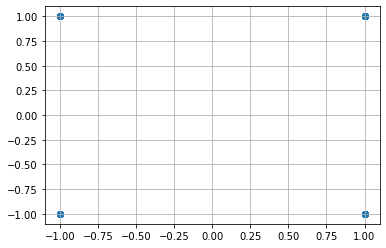

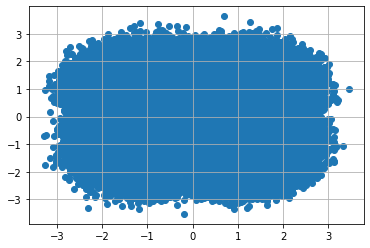

In [32]:
plt.figure()
plt.grid()
scatterConstellation(np.array(_QPSK).flatten(),flag)
plt.figure()
plt.grid()
scatterConstellation(np.array(_QPSKAWGN).flatten(),flag)